# Logistic Regression - Titanic data

In [228]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score,roc_curve
from sklearn.metrics import classification_report, plot_confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns


# Problem Statement

In [163]:
To predict the person is Survived or not

Dependent Variable : Survived
    

SyntaxError: invalid syntax (<ipython-input-163-ea0b26c4f8d0>, line 1)

# Data Gathering

In [164]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [166]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

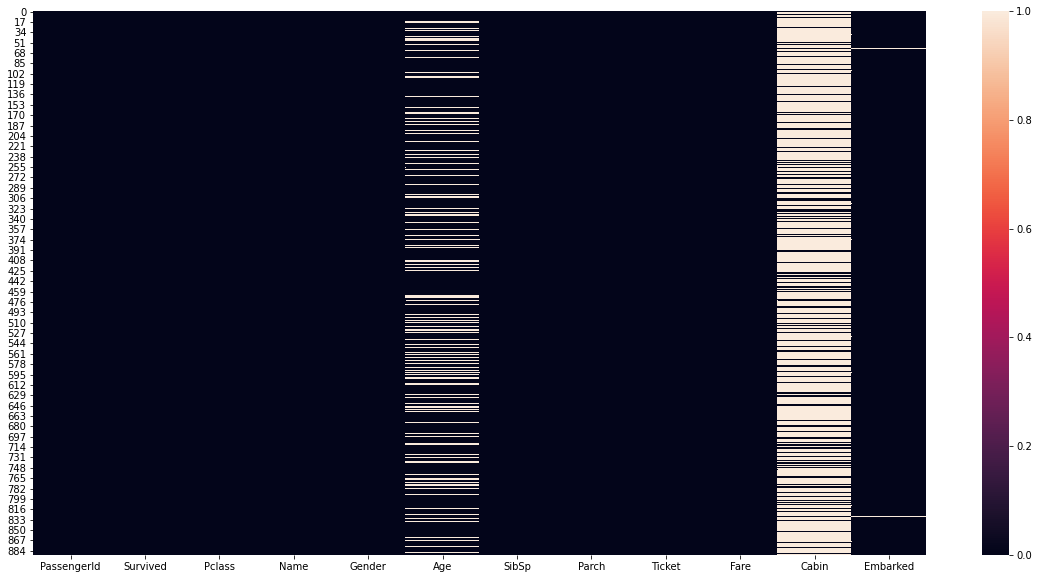

In [167]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna())

## Exploratory Data Analysis

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 1. PassengerId

In [169]:
df['PassengerId'].unique()
df['PassengerId'].nunique()

891

# 2. Survived

In [170]:
df['Survived'].value_counts()

0    547
1    344
Name: Survived, dtype: int64

# 3. Pclass

In [171]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

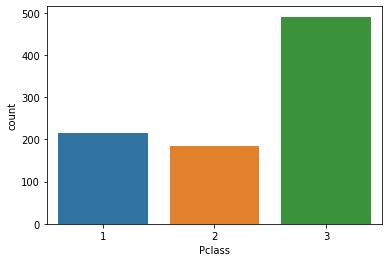

In [172]:
sns.countplot(x = df['Pclass'])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

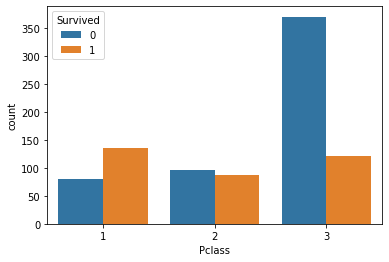

In [173]:
sns.countplot(x = df['Pclass'], hue = df['Survived'])

# Gender

In [174]:
df['Gender'].value_counts()

male      577
female    314
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

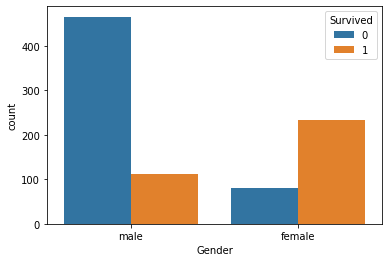

In [175]:
sns.countplot(x = df['Gender'], hue = df['Survived'])

In [176]:
pd.crosstab(df['Gender'], df['Survived'])

Survived,0,1
Gender,,
female,81,233
male,466,111


In [177]:
df['Gender'].value_counts().to_dict()

{'male': 577, 'female': 314}

In [178]:
df['Gender'].replace({'male': 1, 'female': 0}, inplace=True)

## 5. Age

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [180]:
df.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Gender         0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [181]:
df['Age'].mean()

29.69911764705882

In [182]:
age_mean_class0 = df.groupby('Survived').get_group(0)['Age'].mean()

In [183]:
age_mean_class1 = df.groupby('Survived').get_group(1)['Age'].mean()

In [184]:
df.loc[df['Survived'] == 0,'Age'].fillna(age_mean_class0)

0      22.000000
4      35.000000
5      30.719194
6      54.000000
7       2.000000
         ...    
884    25.000000
885    39.000000
886    27.000000
888    30.719194
890    32.000000
Name: Age, Length: 547, dtype: float64

In [185]:
df.loc[df['Survived'] == 0,'Age'] = df.loc[df['Survived'] == 0,'Age'].fillna(age_mean_class0)

In [186]:
df.loc[df['Survived'] == 1,'Age'] = df.loc[df['Survived'] == 1,'Age'].fillna(age_mean_class1)

In [187]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [188]:
df.describe()

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.386083,2.308642,0.647587,29.756188,0.523008,0.381594,32.204208
std,257.353842,0.487123,0.836071,0.477990,13.012389,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


## SibSp            

In [189]:
# df['SibSp'].head(20)

## Parch

In [190]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

# Fare

In [191]:
df['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

<AxesSubplot:xlabel='Fare'>

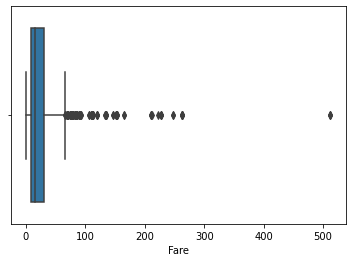

In [192]:
sns.boxplot(x =df['Fare'])

In [193]:
median_fare = df.loc[df['Fare'] < 300,'Fare'].median()
median_fare

14.4542

In [194]:
df.loc[df['Fare'] > 300,'Fare'] = median_fare

<AxesSubplot:xlabel='Fare'>

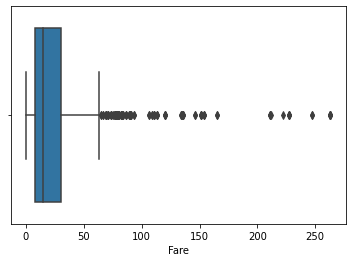

In [195]:
sns.boxplot(x =df['Fare'])

In [196]:
df.describe()

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.386083,2.308642,0.647587,29.756188,0.523008,0.381594,30.527861
std,257.353842,0.487123,0.836071,0.477990,13.012389,1.102743,0.806057,41.117537
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,30.695800
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,263.000000


In [197]:
q1 = df['Fare'].quantile(0.25)
q3 = df['Fare'].quantile(0.75)
iqr = q3 - q1
upper_tail = q3 + 3 * iqr
upper_tail

99.05199999999999

In [198]:
df.loc[df['Fare'] > upper_tail,'Fare'] = upper_tail

<AxesSubplot:xlabel='Fare'>

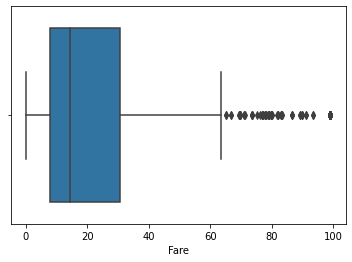

In [199]:
sns.boxplot(x =df['Fare'])

In [200]:
df.isna().mean() * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Gender          0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


## Ticket       

In [202]:
df['Ticket'].nunique()

681

# Embarked

In [203]:
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [204]:
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [209]:
df_Embarked = pd.get_dummies(df['Embarked'],drop_first=True,prefix = 'Embarked')
df_Embarked

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


## Drop Columns

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [212]:
df.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis = 1,inplace = True)

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Gender    891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


## Join DataFrames

In [215]:
df = pd.concat([df, df_Embarked],axis = 1)
df

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.000000,1,0,7.2500,0,1
1,1,1,0,38.000000,1,0,71.2833,0,0
2,1,3,0,26.000000,0,0,7.9250,0,1
3,1,1,0,35.000000,1,0,53.1000,0,1
4,0,3,1,35.000000,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0,1
887,1,1,0,19.000000,0,0,30.0000,0,1
888,0,3,0,30.719194,1,2,23.4500,0,1
889,1,1,1,26.000000,0,0,30.0000,0,0


## Train Test Split

In [216]:
x = df.drop('Survived',axis = 1)
y = df['Survived']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=11, stratify=y)

## Model Training

In [218]:
log_clf = LogisticRegression(max_iter= 200)
log_clf.fit(x_train, y_train)

LogisticRegression(max_iter=200)

# Evaluation

Confusion Matrix :
 [[92 18]
 [30 39]]
clf_report :
               precision    recall  f1-score   support

           0       0.75      0.84      0.79       110
           1       0.68      0.57      0.62        69

    accuracy                           0.73       179
   macro avg       0.72      0.70      0.71       179
weighted avg       0.73      0.73      0.73       179



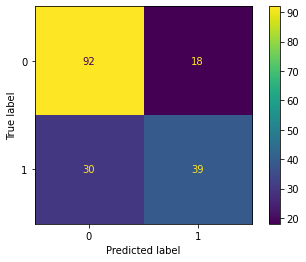

In [232]:
## Testing Data Evaluation
y_pred = log_clf.predict(x_test)
# y_pred
y_pred_prob = log_clf.predict_proba(x_test)
# y_pred_prob

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
plot_confusion_matrix(log_clf,x_test, y_test)

clf_report = classification_report(y_test, y_pred)
print("clf_report :\n",clf_report)

Confusion Matrix :
 [[376  61]
 [ 74 201]]
clf_report :
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       437
           1       0.77      0.73      0.75       275

    accuracy                           0.81       712
   macro avg       0.80      0.80      0.80       712
weighted avg       0.81      0.81      0.81       712



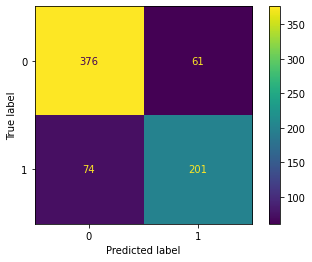

In [234]:
## Training Data Evaluation
y_pred_train = log_clf.predict(x_train)
# y_pred

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

plot_confusion_matrix(log_clf,x_train, y_train)

clf_report = classification_report(y_train, y_pred_train)
print("clf_report :\n",clf_report)

In [ ]:
Recall >> tpr 

# ROC Curve

In [236]:
y_pred_prob = log_clf.predict_proba(x_train)
y_pred_prob

array([[0.85275098, 0.14724902],
       [0.97129017, 0.02870983],
       [0.17696161, 0.82303839],
       ...,
       [0.88919948, 0.11080052],
       [0.9506896 , 0.0493104 ],
       [0.39733405, 0.60266595]])

In [239]:
fpr, tpr, threshold = roc_curve(y_train, y_pred_prob[:,1])
tpr

array([0.        , 0.        , 0.02181818, 0.02909091, 0.25090909,
       0.25090909, 0.29090909, 0.29454545, 0.32363636, 0.33090909,
       0.36727273, 0.36727273, 0.41454545, 0.41454545, 0.42545455,
       0.42545455, 0.42909091, 0.42909091, 0.43636364, 0.44363636,
       0.44363636, 0.44727273, 0.44727273, 0.45454545, 0.46181818,
       0.48      , 0.48      , 0.48727273, 0.48727273, 0.49090909,
       0.49090909, 0.52      , 0.52      , 0.53818182, 0.54545455,
       0.54909091, 0.54909091, 0.57090909, 0.57818182, 0.57818182,
       0.58909091, 0.58909091, 0.59272727, 0.59272727, 0.59636364,
       0.59636364, 0.6       , 0.6       , 0.60363636, 0.60363636,
       0.62181818, 0.62181818, 0.63636364, 0.63636364, 0.64      ,
       0.64      , 0.65090909, 0.65454545, 0.65454545, 0.66181818,
       0.66181818, 0.66909091, 0.66909091, 0.67272727, 0.67272727,
       0.68      , 0.68      , 0.69090909, 0.69090909, 0.69454545,
       0.69454545, 0.69818182, 0.69818182, 0.70181818, 0.70181

In [243]:
# len(threshold)

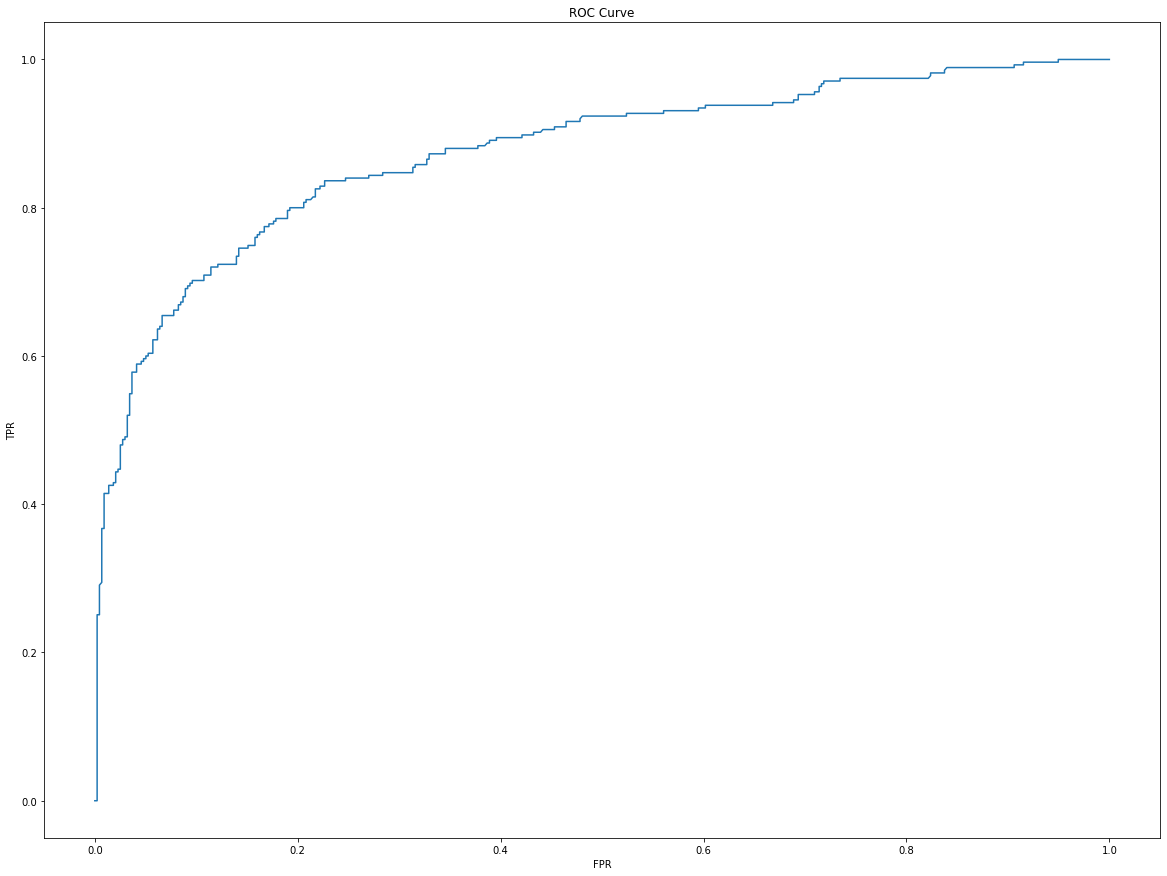

In [247]:
plt.figure(figsize=(20,15))
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC Curve")
plt.savefig("ROC.png")